<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Model_with_Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf 


from tensorflow import keras
from keras import Sequential

In [3]:
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import pathlib 

In [4]:
data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 

In [5]:
data_dir

PosixPath('/content/drive/MyDrive/Data 2')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/Control/IFIT3 Control 5.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 4.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/TatcART/IFIT3 TatcART- 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART2.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 6.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 3.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART1.jpg'),
 PosixPath('/content/drive/MyDrive/Data 2/cART/IFIT3 cART 5.jpg'),
 Posix

In [7]:
len(list(data_dir.glob('*/*.jpg')))

18

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

18

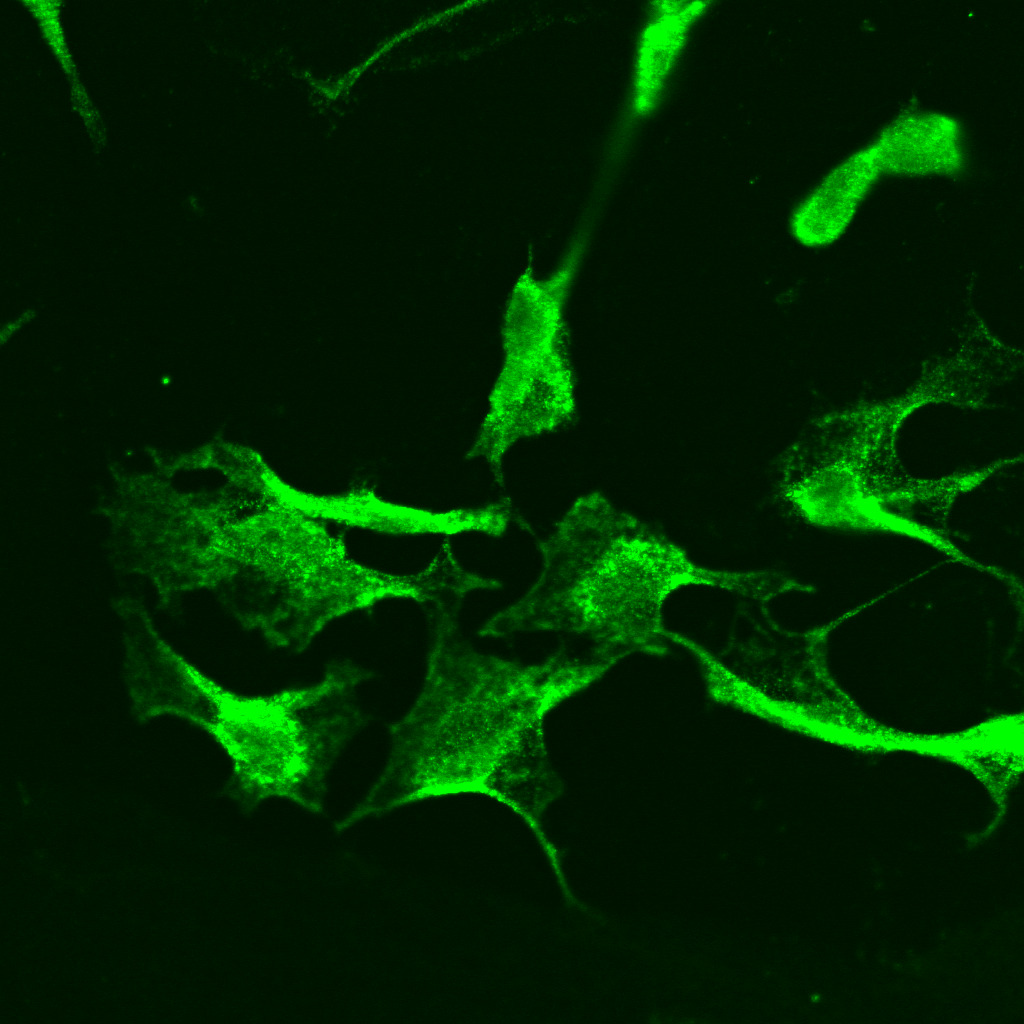

In [9]:
Tat = list(data_dir.glob('Tat/*'))
Tat
PIL.Image.open(str(Tat[1]))

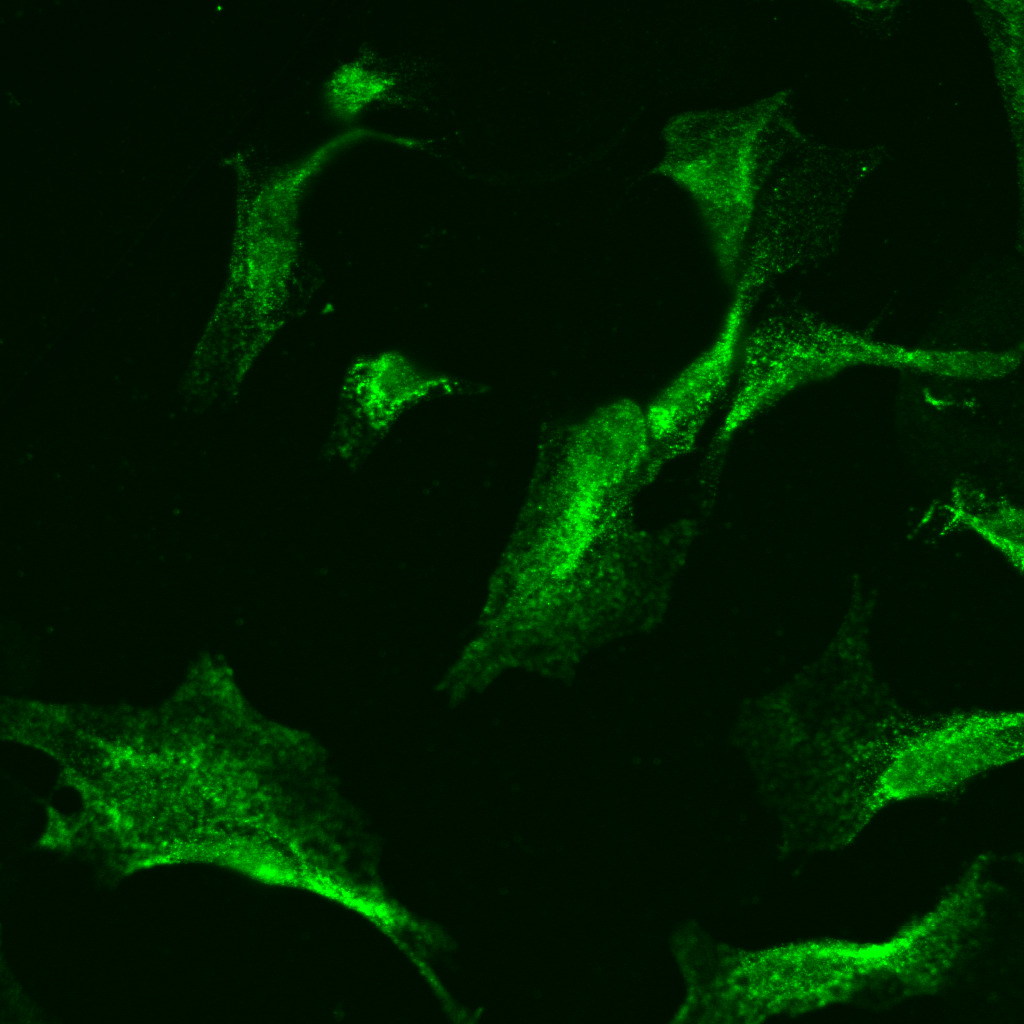

In [10]:
TatcART = list(data_dir.glob('TatcART/*'))
PIL.Image.open(str(TatcART[1]))

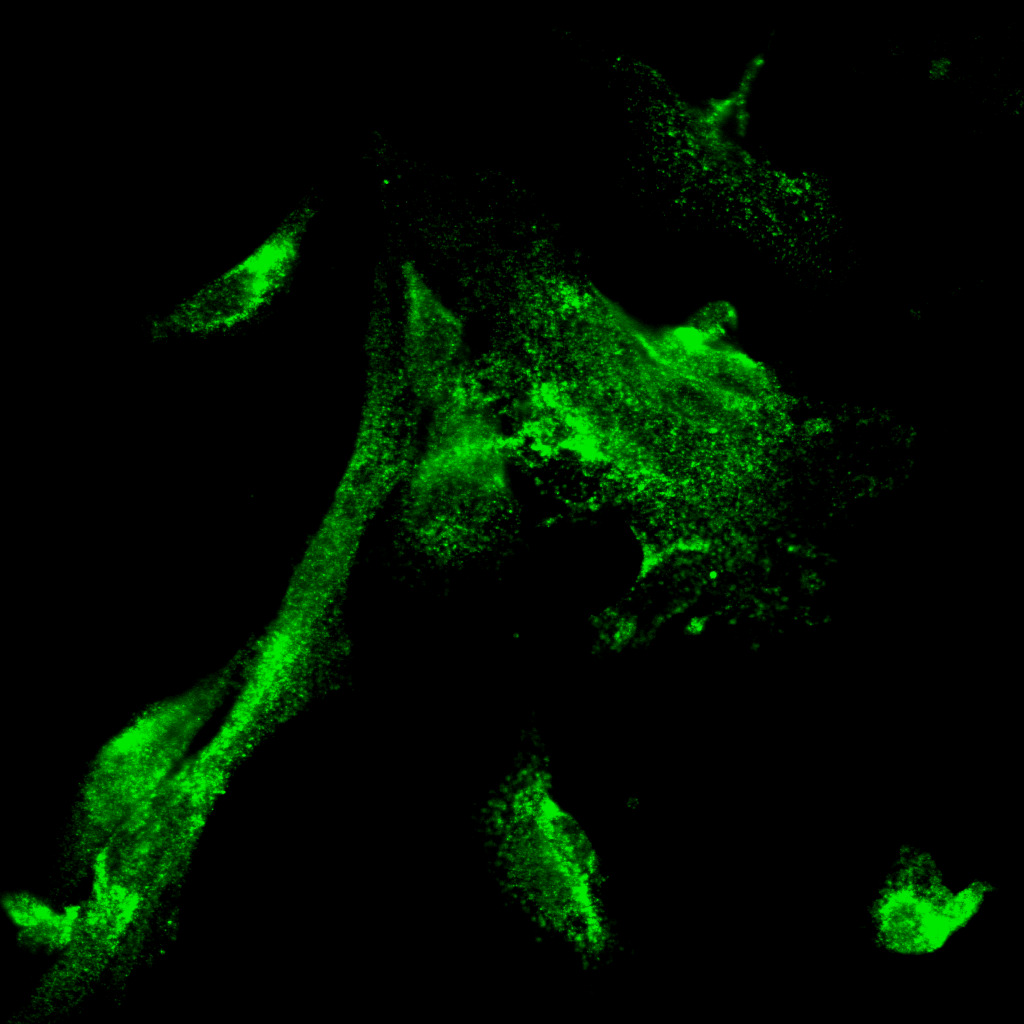

In [11]:
cART = list(data_dir.glob('cART/*'))
cART
PIL.Image.open(str(cART[1]))

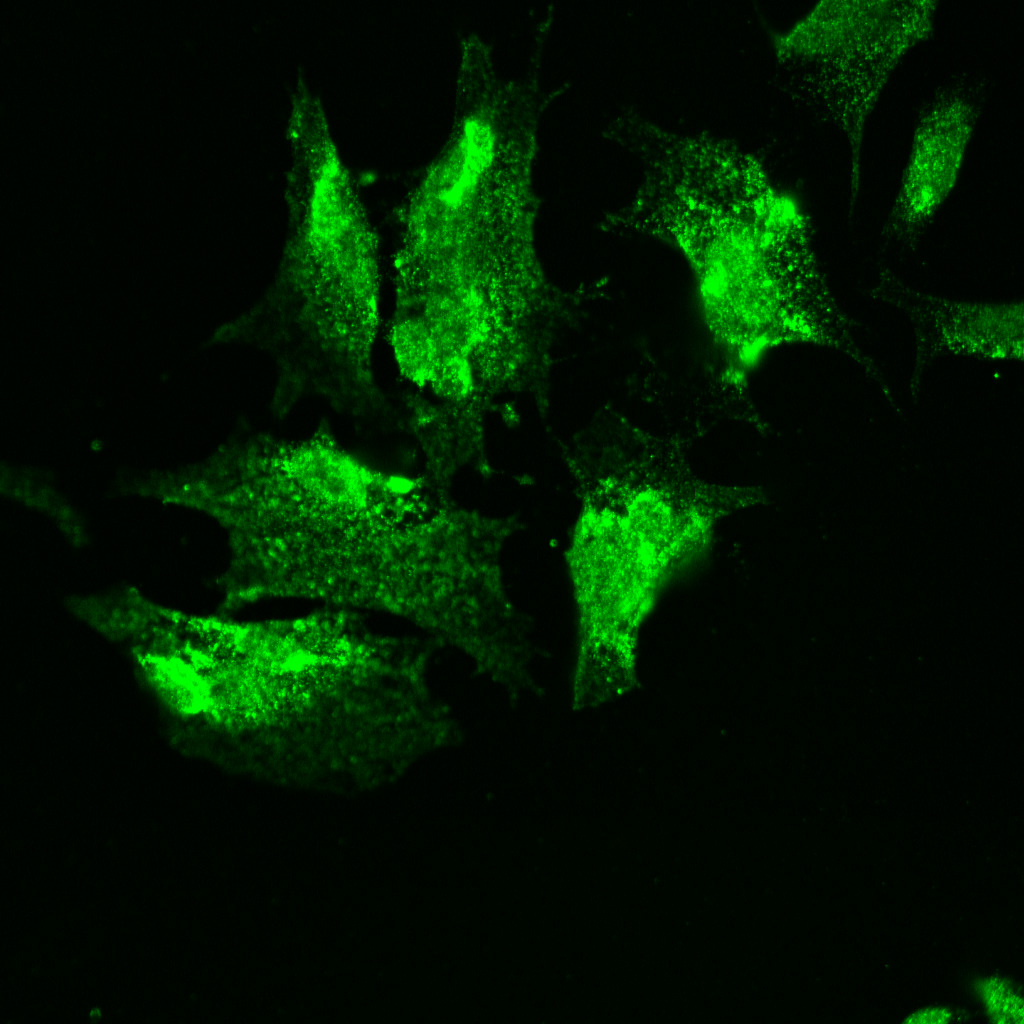

In [12]:
Control = list(data_dir.glob('Control/*'))
PIL.Image.open(str(Control[1]))

In [13]:
gen_images_dict = {
    'cART': list(data_dir.glob('cART/*')),
    'TatcART': list(data_dir.glob('TatcART/*')),
    'Control': list(data_dir.glob('Control/*')),
    'Tat': list(data_dir.glob('Tat/*')),
}

In [14]:
gen_labels_dict = {
    'cART': 0,
    'TatcART': 1,
    'Control': 2,
    'Tat': 3,
}

In [15]:
img = cv2.imread(str(gen_images_dict['cART'][0]))
img.shape

(1024, 1024, 3)

In [16]:
cv2.resize(img,(256,256)).shape

(256, 256, 3)

In [17]:
X, y = [], []

for gen_name, images in gen_images_dict.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img,(256,256))
      X.append(resized_img)
      y.append(gen_labels_dict[gen_name])

In [18]:
X =np.array(X)
y =np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=0) 

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [21]:
data_argumentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

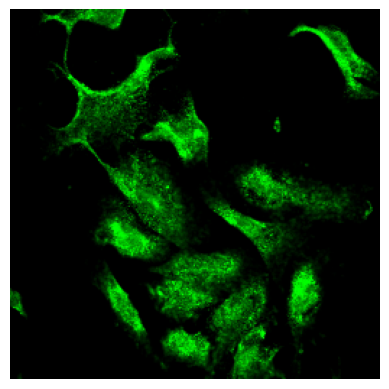

In [22]:
plt.axis('off')
plt.imshow(X[5])

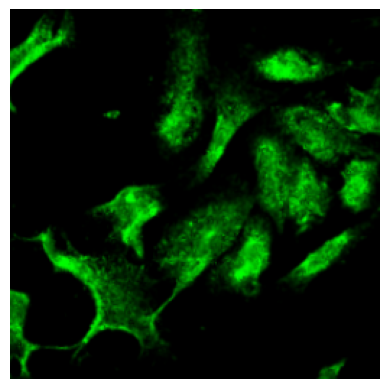

In [23]:
plt.axis('off')
plt.imshow(data_argumentation(X)[5].numpy().astype("uint8"))

In [24]:
num_classes = 4

model = Sequential([
    data_argumentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, padding='same', activation='sigmoid'), 
    layers.MaxPooling2D(),
    layers.Dropout(0.6),
    layers.Flatten (),
    layers. Dense(64, activation='relu'), 
    layers. Dense(128, activation='relu'), 
    layers.Dense (num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled,y_test), epochs=100,batch_size=9)

Epoch 1/100
2/2 [==============================] - 5s 801ms/step - loss: 1.9949 - accuracy: 0.3077 - val_loss: 6.8967 - val_accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 1s 469ms/step - loss: 6.0350 - accuracy: 0.3846 - val_loss: 10.3703 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 1s 522ms/step - loss: 7.3662 - accuracy: 0.3846 - val_loss: 4.7459 - val_accuracy: 0.2000
Epoch 4/100
2/2 [==============================] - 1s 525ms/step - loss: 3.8611 - accuracy: 0.2308 - val_loss: 6.1685 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 1s 460ms/step - loss: 4.3911 - accuracy: 0.2308 - val_loss: 4.3920 - val_accuracy: 0.2000
Epoch 6/100
2/2 [==============================] - 2s 969ms/step - loss: 2.7904 - accuracy: 0.3846 - val_loss: 2.3045 - val_accuracy: 0.4000
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 2.3502 - accuracy: 0.2308 - val_loss: 1.4129 - val_accuracy: 0.4000
Epoch 8/100

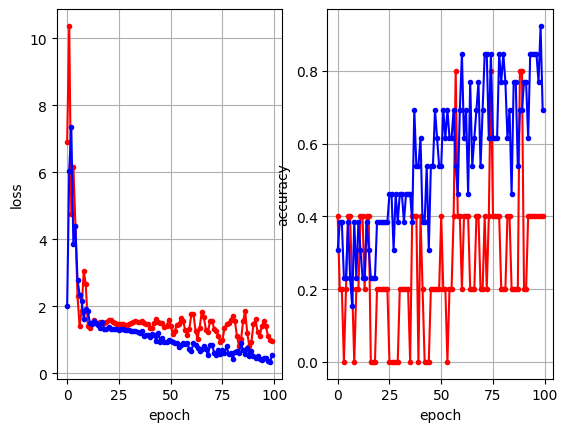

In [27]:
y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 
y_acc = history.history['accuracy'] 
y_vacc = history.history['val_accuracy'] 

fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()

In [28]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 180ms/step - loss: 0.9681 - accuracy: 0.4000


[0.9681397676467896, 0.4000000059604645]